In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
macro_data = pd.read_csv('./data/macro.csv')
train = pd.read_csv('./data/train.csv')
test = pd.read_csv('./data/test.csv')

In [3]:
#Меняем местами full_sq и life_sq, где фулл < 20 и где они стоят неправильно
#Чистим экстримальные значения площадей (больше 500). Наны заливаем в ноль.

# В ячейке 1188 лайф больше фулл - поменяем местами, апартменты не дают информации
train.ix[1188 : 1188, 'full_sq' : 'full_sq'] = 44
train.ix[1188 : 1188, 'life_sq' : 'life_sq'] = 9

#В трейне апартаментах есть те же апартаменты! Легко восстановить
train.ix[1822 : 1822, 'full_sq' : 'full_sq'] = 38
train.ix[1822 : 1822, 'life_sq' : 'life_sq'] = 18
train.ix[1822 : 1822, 'max_floor' : 'max_floor'] = 18
train.ix[1822 : 1822, 'material' : 'material'] = 1
train.ix[1822 : 1822, 'num_room' : 'num_room'] = 1
train.ix[1822 : 1822, 'build_year' : 'build_year'] = 2003
train.ix[1822 : 1822, 'kitch_sq' : 'kitch_sq'] = 10
train.ix[1822 : 1822, 'state' : 'state'] = 3


#Тут уже не все так гладко!
train.ix[2009 : 2009, 'full_sq' : 'full_sq'] = 40
train.ix[2009 : 2009, 'life_sq' : 'life_sq'] = 5
train.ix[2009 : 2009, 'max_floor' : 'max_floor'] = 5
train.ix[2009 : 2009, 'material' : 'material'] = 2
train.ix[2009 : 2009, 'build_year' : 'build_year'] = 1966
train.ix[2009 : 2009, 'kitch_sq' : 'kitch_sq'] = 5
train.ix[2009 : 2009, 'num_room' : 'num_room'] = 2
train.ix[2009 : 2009, 'state' : 'state'] = 3

# Плохо!
train.ix[11332 : 11332, 'full_sq' : 'full_sq'] = 40
train.ix[11332 : 11332, 'life_sq' : 'life_sq'] = 1

# Плохо!
train.ix[22412 : 22412, 'full_sq' : 'full_sq'] = 47
train.ix[22412 : 22412, 'life_sq' : 'life_sq'] = 1

# Плохо!
train.ix[24296 : 24296, 'full_sq' : 'full_sq'] = 77
train.ix[24296 : 24296, 'life_sq' : 'life_sq'] = 0

# Лайф очень маленький, возможно эту 1 стоит заменить
train.ix[26264 : 26264, 'full_sq' : 'full_sq'] = 60
train.ix[26264 : 26264, 'life_sq' : 'life_sq'] = 1

# Плохо!
train.ix[26363 : 26363, 'full_sq' : 'full_sq'] = 64
train.ix[26363 : 26363, 'life_sq' : 'life_sq'] = 1

# Все ок
train.ix[3527 : 3527, 'full_sq' : 'full_sq'] = 53.26

# Все ок
train.ix[23715 : 23715, 'full_sq' : 'full_sq'] = 60

# Все ок
train.ix[1610 : 1610, 'full_sq' : 'full_sq'] = 37

# Все ок
train.ix[3596 : 3596, 'full_sq' : 'full_sq'] = 38

# Все ок
test.ix[464 : 464, 'full_sq' : 'full_sq'] = 37
test.ix[464 : 464, 'life_sq' : 'life_sq'] = np.nan

# Ок
test.ix[2804 : 2804, 'full_sq' : 'full_sq'] = 33.8
test.ix[2804 : 2804, 'life_sq' : 'life_sq'] = 14.8

# Ок
test.ix[5383 : 5383, 'full_sq' : 'full_sq'] = 42.07
test.ix[5383 : 5383, 'life_sq' : 'life_sq'] = 1

# Исправляем несколько ошибок
# Есть объекты, где жилая площадь и площадь кухни больше, чем общая площадь, возможно, их стоит удалить
train = train[train['full_sq'] > 10] #тут полная шляпа - много нанов и единиц
train.ix[10368 : 10368, 'kitch_sq' : 'kitch_sq'] = np.nan
train.ix[13117 : 13117, 'build_year' : 'build_year'] = 1970
train.ix[13117 : 13117, 'kitch_sq' : 'kitch_sq'] = np.nan
#Удалили явные ошибки

#Исправляем точки, где full_sq < life_sq
train.ix[1084 : 1084, 'life_sq' : 'life_sq'] = 28.1

train.ix[1863 : 1863, 'life_sq' : 'life_sq'] = 17.8
train.ix[4385 : 4385, 'life_sq' : 'life_sq'] = 42.6

train.ix[6336 : 6336, 'life_sq' : 'life_sq'] = 19.1

train.ix[6531 : 6531, 'full_sq' : 'full_sq'] = 88
train.ix[6531 : 6531, 'life_sq' : 'life_sq'] = 80

train.ix[6993 : 6993, 'full_sq' : 'full_sq'] = 77
train.ix[6993 : 6993, 'life_sq' : 'life_sq'] = 73

train.ix[7208 : 7208, 'life_sq' : 'life_sq'] = 19.5

train.ix[8101 : 8101, 'full_sq' : 'full_sq'] = 38
train.ix[8101 : 8101, 'life_sq' : 'life_sq'] = 37

train.ix[9237 : 9237, 'life_sq' : 'life_sq'] = 30.1

train.ix[9256 : 9256, 'life_sq' : 'life_sq'] = 45.8

train.ix[9482 : 9482, 'full_sq' : 'full_sq'] = 53
train.ix[9482 : 9482, 'life_sq' : 'life_sq'] = 52

train.ix[9646 : 9646, 'life_sq' : 'life_sq'] = 80.2

train.ix[11711 : 11711, 'full_sq' : 'full_sq'] = 58
train.ix[11711 : 11711, 'life_sq' : 'life_sq'] = 56

train.ix[11784 : 11784, 'full_sq' : 'full_sq'] = 59
train.ix[11784 : 11784, 'life_sq' : 'life_sq'] = 46

train.ix[12569 : 12569, 'full_sq' : 'full_sq'] = 60
train.ix[12569 : 12569, 'life_sq' : 'life_sq'] = 56

train.ix[13546 : 13546, 'life_sq' : 'life_sq'] = 74.78

train.ix[13629 : 13629, 'life_sq' : 'life_sq'] = 25.9

train.ix[13797 : 13797, 'life_sq' : 'life_sq'] = 16.3

train.ix[14799 : 14799, 'full_sq' : 'full_sq'] = 77
train.ix[14799 : 14799, 'life_sq' : 'life_sq'] = 73

train.ix[16067 : 16067, 'full_sq' : 'full_sq'] = 52
train.ix[16067 : 16067, 'life_sq' : 'life_sq'] = 50

train.ix[16116 : 16116, 'full_sq' : 'full_sq'] = 85
train.ix[16116 : 16116, 'life_sq' : 'life_sq'] = 84

train.ix[16284 : 16284, 'full_sq' : 'full_sq'] = 62
train.ix[16284 : 16284, 'life_sq' : 'life_sq'] = 33

train.ix[20672 : 20672, 'full_sq' : 'full_sq'] = 45
train.ix[20672 : 20672, 'life_sq' : 'life_sq'] = 44

train.ix[21080 : 21080, 'full_sq' : 'full_sq'] = 52
train.ix[21080 : 21080, 'life_sq' : 'life_sq'] = 34.9

train.ix[22611 : 22611, 'full_sq' : 'full_sq'] = 38
train.ix[22611 : 22611, 'life_sq' : 'life_sq'] = 37

train.ix[22804 : 22804, 'full_sq' : 'full_sq'] = 55
train.ix[22804 : 22804, 'life_sq' : 'life_sq'] = 54

train.ix[24428 : 24428, 'full_sq' : 'full_sq'] = 55
train.ix[24428 : 24428, 'life_sq' : 'life_sq'] = 54

train.ix[26342 : 26342, 'life_sq' : 'life_sq'] = 43.5

train.ix[29302 : 29302, 'full_sq' : 'full_sq'] = 57
train.ix[29302 : 29302, 'life_sq' : 'life_sq'] = 56


test.ix[64 : 64, 'full_sq' : 'full_sq'] = 30.6
test.ix[64 : 64, 'life_sq' : 'life_sq'] = 29.8

test.ix[119 : 119, 'full_sq' : 'full_sq'] = 104.28
test.ix[119 : 119, 'life_sq' : 'life_sq'] = 100.04

test.ix[171: 171, 'full_sq' : 'full_sq'] = 60
test.ix[171 : 171, 'life_sq' : 'life_sq'] = 57.8

test.ix[601 : 601, 'life_sq' : 'life_sq'] = 74.2

test.ix[1896 : 1896, 'life_sq' : 'life_sq'] = 36.1

test.ix[2027 : 2027, 'full_sq' : 'full_sq'] = 93.2
test.ix[2027 : 2027, 'life_sq' : 'life_sq'] = 51.9

test.ix[2031 : 2031, 'full_sq' : 'full_sq'] = 40.2
test.ix[2031 : 2031, 'life_sq' : 'life_sq'] = 23.7

test.ix[2791 : 2791, 'life_sq' : 'life_sq'] = 86.9

test.ix[5187 : 5187, 'full_sq' : 'full_sq'] = 56.3
test.ix[5187 : 5187, 'life_sq' : 'life_sq'] = 28.3

In [4]:
latlon = pd.read_csv('./data/train_lat_lon.csv')
data = pd.concat([train,test])
train_idx = data[pd.notnull(data['price_doc'])].index

In [5]:
test_idx = data[pd.isnull(data['price_doc'])].index

In [6]:
macro_data.shape

(2484, 100)

In [7]:
def describe_nans(df):
    to_drop = []
    nansfraclist = []
    textdatacols = []
    suspicious = []
    for col in df.columns:
        nans = df[col].isnull().sum()    
        nansfrac = nans/df.shape[0]
        unique = df[col].value_counts()
        if nansfrac > 0.4 or len(unique) < 3:
            to_drop.append(col)
        #print( '-'*10)
        #print('Column {} statistics:'.format(col))
        #print( '-'*10)
        #print('Nan\'s count: {0} | Fraction: {1:.5f}'.format(nans,nansfrac))
        #print('Num unique : {0}'.format(len(unique)))
        nansfraclist.append((nansfrac,col))
        if not nans:
            flag = False
            for i in range(3):
                if i in unique.index:
                    flag = True
            if flag:
                suspicious.append(col)
            try:
                df[col].astype(int)
            except:
                print('Text data in {}'.format(col))
                textdatacols.append(col)
    nansfraclist = sorted(nansfraclist, key = lambda x: x[0], reverse = True)
    df = df[[i[1] for i in nansfraclist]]
    return df,nansfraclist,textdatacols, suspicious

In [8]:
macro_data, nancount, textdatacols, suspicious = describe_nans(macro_data)

Text data in timestamp


In [9]:
nancount

[(0.7061191626409018, 'provision_retail_space_modern_sqm'),
 (0.70571658615136879, 'provision_retail_space_sqm'),
 (0.5591787439613527, 'modern_education_share'),
 (0.5591787439613527, 'old_education_build_share'),
 (0.41183574879227053, 'grp_growth'),
 (0.41183574879227053, 'load_of_teachers_preschool_per_teacher'),
 (0.41183574879227053, 'hospital_beds_available_per_cap'),
 (0.41183574879227053, 'hospital_bed_occupancy_per_year'),
 (0.41183574879227053, 'theaters_viewers_per_1000_cap'),
 (0.41183574879227053, 'museum_visitis_per_100_cap'),
 (0.41183574879227053, 'population_reg_sports_share'),
 (0.41183574879227053, 'students_reg_sports_share'),
 (0.26489533011272143, 'grp'),
 (0.26489533011272143, 'real_dispos_income_per_cap_growth'),
 (0.26489533011272143, 'salary_growth'),
 (0.26489533011272143, 'profitable_enterpr_share'),
 (0.26489533011272143, 'unprofitable_enterpr_share'),
 (0.26489533011272143, 'share_own_revenues'),
 (0.26489533011272143, 'overdue_wages_per_cap'),
 (0.264895

In [10]:
data, nancount, textdatacols, suspicious = describe_nans(data)

Text data in big_market_raion
Text data in big_road1_1line
Text data in culture_objects_top_25
Text data in detention_facility_raion
Text data in ecology
Text data in incineration_raion
Text data in nuclear_reactor_raion
Text data in oil_chemistry_raion
Text data in radiation_raion
Text data in railroad_1line
Text data in railroad_terminal_raion
Text data in sub_area
Text data in thermal_power_plant_raion
Text data in timestamp
Text data in water_1line


Encode all data in list above

In [11]:
nancount

[(0.46822356336919446, 'hospital_beds_raion'),
 (0.43106796116504853, 'cafe_avg_price_500'),
 (0.43106796116504853, 'cafe_sum_500_max_price_avg'),
 (0.43106796116504853, 'cafe_sum_500_min_price_avg'),
 (0.38436106008921544, 'build_year'),
 (0.37389136709525062, 'state'),
 (0.25111519286276568, 'kitch_sq'),
 (0.25106271319863555, 'material'),
 (0.25106271319863555, 'max_floor'),
 (0.25106271319863555, 'num_room'),
 (0.21710837050642876, 'preschool_quota'),
 (0.21700341117816846, 'school_quota'),
 (0.2030175806874836, 'cafe_avg_price_1000'),
 (0.2030175806874836, 'cafe_sum_1000_max_price_avg'),
 (0.2030175806874836, 'cafe_sum_1000_min_price_avg'),
 (0.201049593282603, 'price_doc'),
 (0.19834689057990029, 'life_sq'),
 (0.16271319863552874, 'build_count_1921-1945'),
 (0.16271319863552874, 'build_count_1946-1970'),
 (0.16271319863552874, 'build_count_1971-1995'),
 (0.16271319863552874, 'build_count_after_1995'),
 (0.16271319863552874, 'build_count_before_1920'),
 (0.16271319863552874, 'buil

Проблемы с NAN в:
- build year - исправить или дамми
- state - дохерища нанов, ставить дамми.
- cafe_sum_500_min_price_avg, cafe_sum_500_max_price_avg, cafe_avg_price_500 - 43.5% нанов, скорее всего выкинуть
- max_floor - исправить NAN, есть нули (550). Проверить одно-двух этажные дома по цене квартиры.
- material - поставим дамми, все хорошо
- num_room - исправить NAN, есть нули (14). Сделать отдельную дамми под такие квартиры.
- kitch_sq - исправить NAN, есть нули и херня вроде 2013. 
- **по четырем фичам сверху (max_floor, material, num_room, kitch_sq) - одинаковое число NAN в каждой фиче, надо проверить**
- preschool_quota, school_quota - исправить NAN, попробовав восстановить по району
- cafe_sum_1000_min_price_avg, cafe_sum_1000_max_price_avg, cafe_avg_price_1000 - 21.4% нанов, скорее всего выкинуть
- life_sq - исправить NAN, есть нули и единицы. Возможно стоит выкинуть. ОЧЕНЬ слабая корреляция с полной площадью квартиры и это странно
- raion_build_count_with_material_info - число зданий в том же районе, что и наблюдение, по которым известен материал дома. Хз что делать с NAN (избытыточная фича, равна сумме по build_count_x)
- build_count_x - тоже непонятно, что делать с NAN. 
- raion_build_count_with_builddate_info - аналогично с выше.(избытыточная фича, равна сумме по build_count_x)
- build_count_x-y - аналогично с выше.
- **данные по build\_count\_ (год или материал) отсутствуют либо во всей строчке, либо есть все**
- cafe_sum_1500_min_price_avg, cafe_sum_1500_max_price_avg, cafe_avg_price_1500 - 13.7% нанов
- **все переменные вида cafe_sum - надо пробовать восстановить по району**
- prom_part_5000 - возможно стоит выкинуть, потому что есть 500-1000 и т.д. метровые зоны.  5км далековато. С другой стороны можно восстановить средним, плохо скорее всего не будет. 
- floor - 167 нанов, аномальные значения (77 этаж, на деле скорее всего 7). Восстанавливать медианой плохая идея. Можно попробовать посмотреть ценовую категорию этих нанов и восстановить средней этажностью из той же ценовой категории
- metro_min_walk, metro_km_walk, railroad_station_walk_km, railroad_station_walk_min, ID_railroad_station_walk - во-первых линейная зависимость, во-вторых - одинаковое число нанов по этим переменным. Надо смотреть внимательнее на эту группу зданий.

In [12]:
#конвертируем timestamp в дату
data['timestamp'] = pd.to_datetime(data['timestamp'])

Ебанутые цифры в:
- full_sq - удалить, все что меньше санитарных норм (сейчас это 28 кв м на однокомнатную хату). Но думаю стоит тереть все, что меньше 25 - дальше сильный вспелеск в виде 80-100 квартир, что неслучайно скорее всего
- все расстояния - есть ровно нули, при этом же есть расстояния вида 0.15. Надо смотреть

Гипотеза о хуете в четверке max_floor, material, num_room, kitch_sq:

In [13]:
data[data['max_floor'].isnull()][['max_floor', 'material', 'num_room', 'kitch_sq']].isnull().sum()

max_floor    9568
material     9568
num_room     9568
kitch_sq     9568
dtype: int64

In [14]:
bad_idx = data[data['max_floor'].isnull()].index

Гипотеза о хуете подтвердилась. Также NAN в этих квартирах:
- state
- build_year
- 

In [15]:
data.loc[bad_idx,'timestamp'].apply(lambda x: x.year).value_counts()

2012    4836
2016    3981
2013    3979
2015    3677
2011     753
Name: timestamp, dtype: int64

In [16]:
data['timestamp'].apply(lambda x: x.year).value_counts()

2014    13641
2013     7977
2015     6918
2012     4838
2016     3983
2011      753
Name: timestamp, dtype: int64

In [17]:
#новая фича как у индуса
data['unique_building'] = data['sub_area'].astype(str) + data['metro_km_avto'].astype(str) + \
data['metro_km_walk'].astype(str) + data['mkad_km'].astype(str) + data['ttk_km'].astype(str) + \
data['sadovoe_km'].astype(str) + data['bulvar_ring_km'].astype(str) + data['kremlin_km'].astype(str)
#заджойним
desirable = (data['unique_building'].value_counts()!=1).reset_index()
data = data.merge(desirable, left_on ='unique_building', right_on = 'index', how = 'left',copy = False)
data.loc[data['unique_building_y']==False,'unique_building_x'] = 'Too rare'
data.drop(['index','unique_building_y'], axis = 1, inplace = True)
#создадим наконец фичу
data['factorized'] = pd.factorize(data['unique_building_x'])[0]

In [18]:
data = data.merge(latlon[['id','lat','lon','tolerance_m']], on = 'id', how = 'left', copy = False)

Возможно не стоит делать дамми на дома, где всего одна квартира.

In [19]:
data.loc[data['sub_area']=='Timirjazevskoe']

,hospital_beds_raion,cafe_avg_price_500,cafe_sum_500_max_price_avg,cafe_sum_500_min_price_avg,build_year,state,kitch_sq,material,max_floor,num_room,...,workplaces_km,young_all,young_female,young_male,zd_vokzaly_avto_km,unique_building_x,factorized,lat,lon,tolerance_m
104,1340.0,745.00,950.00,540.00,NaN,NaN,NaN,NaN,NaN,NaN,...,2.147235,11205,5347,5858,7.448905,Timirjazevskoe0.4171087020.4171087027.08406891...,63,55.843347,37.573404,5.0
573,1340.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.258037,11205,5347,5858,5.183094,Timirjazevskoe1.6633356481.6633356488.08031731...,370,55.832274,37.570088,5.0
754,1340.0,883.33,1083.33,683.33,NaN,NaN,NaN,NaN,NaN,NaN,...,2.445893,11205,5347,5858,6.881734,Timirjazevskoe0.3591823490.3591823496.80573737...,479,55.846548,37.571178,25.0
760,1340.0,825.00,1000.00,650.00,NaN,NaN,NaN,NaN,NaN,NaN,...,0.784074,11205,5347,5858,3.713157,Timirjazevskoe1.6138291781.96895023410.0574484...,483,55.808535,37.562998,25.0
903,1340.0,825.00,1000.00,650.00,NaN,NaN,NaN,NaN,NaN,NaN,...,0.755530,11205,5347,5858,3.149234,Timirjazevskoe0.9076831740.5244767810.33863828...,568,55.810689,37.578872,10.0
1442,1340.0,825.00,1000.00,650.00,NaN,NaN,NaN,NaN,NaN,NaN,...,0.784074,11205,5347,5858,3.713157,Timirjazevskoe1.6138291781.96895023410.0574484...,483,55.808535,37.562998,25.0
1515,1340.0,825.00,1000.00,650.00,NaN,NaN,NaN,NaN,NaN,NaN,...,0.755530,11205,5347,5858,3.149234,Timirjazevskoe0.9076831740.5244767810.33863828...,568,55.810689,37.578872,10.0
1575,1340.0,400.00,500.00,300.00,NaN,NaN,NaN,NaN,NaN,NaN,...,0.268447,11205,5347,5858,4.787306,Too rare,1,55.824979,37.561127,10.0
1593,1340.0,883.33,1083.33,683.33,NaN,NaN,NaN,NaN,NaN,NaN,...,2.445893,11205,5347,5858,6.881734,Timirjazevskoe0.3591823490.3591823496.80573737...,479,55.846548,37.571178,25.0
1797,1340.0,400.00,500.00,300.00,NaN,NaN,NaN,NaN,NaN,NaN,...,0.471802,11205,5347,5858,3.496595,Timirjazevskoe1.424784781.54971522610.07854323...,1037,55.809413,37.566452,25.0


In [20]:
data[data['factorized']==4][['price_doc','timestamp','sub_area','full_sq','max_floor','floor',
                               'build_count_frame','school_quota']]

,price_doc,timestamp,sub_area,full_sq,max_floor,floor,build_count_frame,school_quota
5,9100000.0,2011-09-06,Nizhegorodskoe,67.0,NaN,14.0,0.0,2012.0
2307,5250000.0,2012-05-28,Nizhegorodskoe,35.0,NaN,10.0,0.0,2012.0
18755,8500000.0,2014-05-22,Nizhegorodskoe,53.0,16.0,9.0,0.0,2012.0


In [18]:
data[data['factorized']==1][['price_doc','timestamp','sub_area','full_sq','max_floor',
                                  'floor','lat','lon','tolerance_m','product_type']]

,price_doc,timestamp,sub_area,full_sq,max_floor,floor,lat,lon,tolerance_m,product_type
1,6000000.0,2011-08-23,Nagatinskij Zaton,34.00,NaN,3.0,55.676999,37.673135,5.0,Investment
2,5700000.0,2011-08-27,Tekstil'shhiki,43.00,NaN,2.0,55.702946,37.741159,10.0,Investment
6,5500000.0,2011-09-08,Sokol'niki,25.00,NaN,10.0,55.794036,37.693422,10.0,Investment
12,5100000.0,2011-09-17,Kuncevo,43.00,NaN,4.0,55.729145,37.405393,5.0,Investment
13,5200000.0,2011-09-19,Presnenskoe,31.00,NaN,4.0,55.757005,37.543047,25.0,Investment
16,6300000.0,2011-09-20,Kuz'minki,47.00,NaN,4.0,55.695814,37.756374,5.0,Investment
19,5200000.0,2011-09-22,Gol'janovo,44.00,NaN,4.0,55.811820,37.780660,10.0,Investment
20,8200000.0,2011-09-22,Vnukovo,74.00,NaN,10.0,55.612442,37.254852,10.0,Investment
22,6250000.0,2011-09-23,Severnoe Tushino,48.00,NaN,6.0,55.853467,37.425662,5.0,Investment
24,6000000.0,2011-09-23,Juzhnoe Tushino,34.00,NaN,11.0,55.839436,37.414669,10.0,Investment


Inbestment vs non-investement

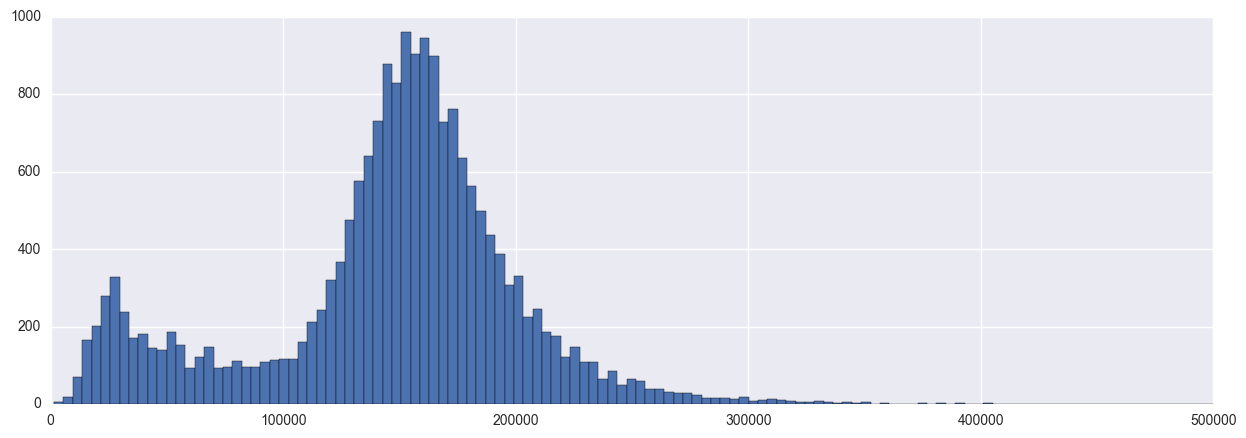

In [74]:
fig =plt.figure(figsize=(15,5))
plt.hist(train.loc[train['product_type']=='Investment', 'per_meter'], bins = 500)
plt.xlim(0,5e5)
plt.show()

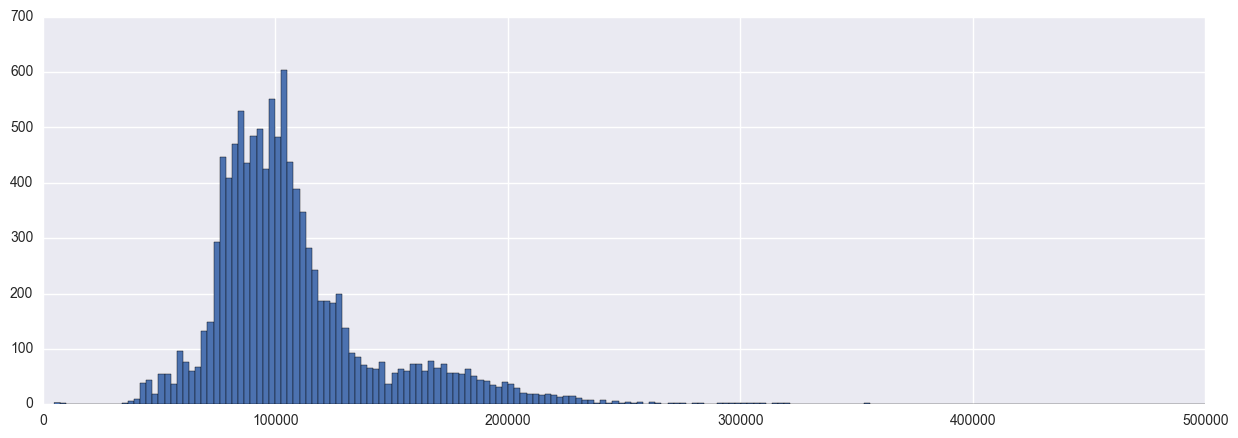

In [72]:
fig =plt.figure(figsize=(15,5))
plt.hist(train.loc[train['product_type']!='Investment', 'per_meter'], bins = 200)
plt.xlim(0,5e5)
plt.show()

In [43]:
train['timestamp'] = pd.to_datetime(train['timestamp'])

In [59]:
not_built_yet = train[train['timestamp'].apply(lambda x: x.year) < train['build_year']]

In [60]:
train.loc[train['product_type']=='Investment', ['price_doc','build_year','timestamp','per_meter']]

,price_doc,build_year,timestamp,per_meter
0,5850000,NaN,2011-08-20,136046.511628
1,6000000,NaN,2011-08-23,176470.588235
2,5700000,NaN,2011-08-27,132558.139535
3,13100000,NaN,2011-09-01,147191.011236
4,16331452,NaN,2011-09-05,212096.779221
5,9100000,NaN,2011-09-06,135820.895522
6,5500000,NaN,2011-09-08,220000.000000
7,2000000,NaN,2011-09-09,45454.545455
8,5300000,NaN,2011-09-10,126190.476190
9,2000000,NaN,2011-09-13,55555.555556


In [52]:
not_built_yet['product_type'].value_counts()

OwnerOccupier    1131
Investment          2
Name: product_type, dtype: int64

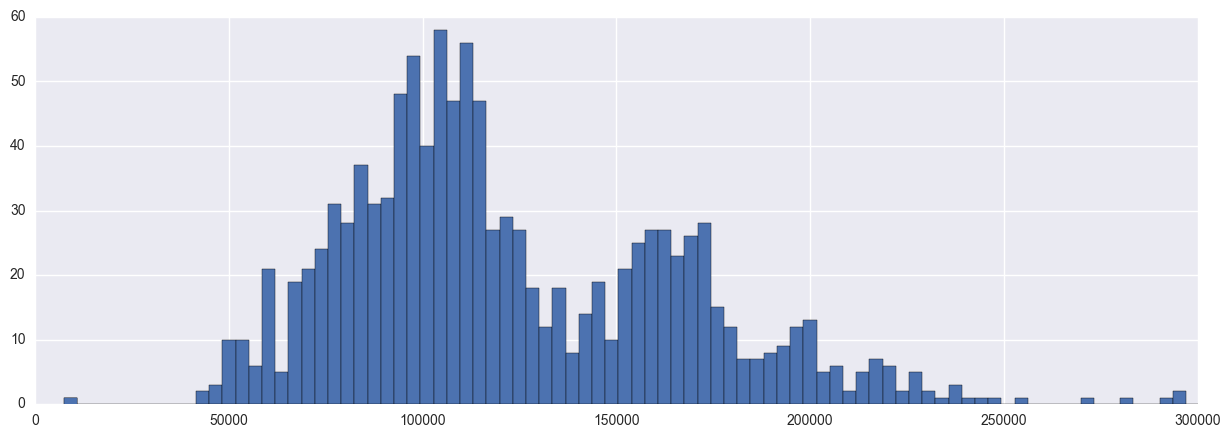

In [63]:
fig =plt.figure(figsize=(15,5))
plt.hist(not_built_yet['per_meter'], bins = 100)
plt.xlim(0,3e5)
plt.show()

In [57]:
train['per_meter'] = train['price_doc']/train['full_sq']
gr = train[['per_meter','timestamp']].groupby('timestamp').agg(np.mean)

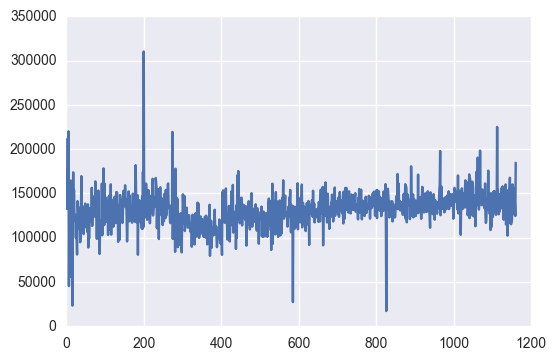

In [58]:
plt.plot([i for i in range(len(gr))], gr)

In [20]:
#before
data['max_floor'].isnull().sum()

9568

In [21]:
#пробуем восстановить max_floor
data['average_microraion_price'] = np.nan
grouped = data[['factorized', 'price_doc','max_floor']].groupby(by = 'factorized')
groupwise_stats = grouped.agg(np.nanmean)
for group in grouped: 
    max_floor,mean_price = groupwise_stats.loc[group[0],['max_floor','price_doc']]
    if group[0] == 1:
        continue
    group_idx = group[1].index
    data.loc[group_idx,'max_floor'] = data.loc[group_idx,'max_floor'].fillna(max_floor)
    data.loc[group_idx,'average_microraion_price'] = mean_price

D:\Anaconda3\lib\site-packages\numpy\lib\nanfunctions.py:703: RuntimeWarning: Mean of empty slice
  warnings.warn("Mean of empty slice", RuntimeWarning)
D:\Anaconda3\lib\site-packages\numpy\lib\nanfunctions.py:703: RuntimeWarning: Mean of empty slice
  warnings.warn("Mean of empty slice", RuntimeWarning)
D:\Anaconda3\lib\site-packages\numpy\lib\nanfunctions.py:703: RuntimeWarning: Mean of empty slice
  warnings.warn("Mean of empty slice", RuntimeWarning)
D:\Anaconda3\lib\site-packages\numpy\lib\nanfunctions.py:703: RuntimeWarning: Mean of empty slice
  warnings.warn("Mean of empty slice", RuntimeWarning)
D:\Anaconda3\lib\site-packages\numpy\lib\nanfunctions.py:703: RuntimeWarning: Mean of empty slice
  warnings.warn("Mean of empty slice", RuntimeWarning)
D:\Anaconda3\lib\site-packages\numpy\lib\nanfunctions.py:703: RuntimeWarning: Mean of empty slice
  warnings.warn("Mean of empty slice", RuntimeWarning)
D:\Anaconda3\lib\site-packages\numpy\lib\nanfunctions.py:703: RuntimeWarning: Mean

In [22]:
data['max_floor'].isnull().sum()

2651

In [23]:
data = data[pd.notnull(data['floor'])]

data.drop(['hospital_beds_raion', 'cafe_sum_500_min_price_avg',
             'cafe_sum_500_max_price_avg', 'cafe_avg_price_500','cafe_sum_1000_min_price_avg',
            'cafe_sum_1000_max_price_avg','cafe_avg_price_1000',
             'raion_build_count_with_material_info','raion_build_count_with_builddate_info',
            'cafe_sum_1500_min_price_avg','cafe_sum_1500_max_price_avg','cafe_avg_price_1500',
            'cafe_sum_2000_min_price_avg','cafe_sum_2000_max_price_avg','cafe_avg_price_2000',
            'cafe_sum_3000_min_price_avg', 'cafe_sum_3000_max_price_avg', 'cafe_avg_price_3000',
            'prom_part_5000','kitch_sq','num_room','lat','lon','tolerance_m','average_microraion_price','life_sq'
          ], axis = 1, inplace = True)

In [24]:
data.drop(['kitch_sq','num_room','lat','lon','tolerance_m','average_microraion_price','life_sq'
          ], axis = 1, inplace = True)

ValueError: labels ['kitch_sq' 'num_room' 'lat' 'lon' 'tolerance_m' 'average_microraion_price'
 'life_sq'] not contained in axis

Вернуть kitch_sq,num_room,average_microraion_price,life_sq

In [25]:
bad_cols = ['build_year', 'state', 'material','preschool_quota','school_quota','build_count_block',
      'build_count_wood','build_count_frame','build_count_brick','build_count_monolith',
      'build_count_panel','build_count_foam','build_count_slag','build_count_mix',
      'build_count_before_1920','build_count_1921-1945','build_count_1946-1970',
      'build_count_1971-1995','build_count_after_1995','cafe_sum_5000_min_price_avg',
      'cafe_sum_5000_max_price_avg', 'cafe_avg_price_5000','max_floor','green_part_2000','ID_railroad_station_walk',
           'metro_km_walk','metro_min_walk','railroad_station_walk_km','railroad_station_walk_min',
           ]
for col in bad_cols:
    data[col] = data[col].fillna(0)

In [26]:
data['product_type'].fillna('Investment', inplace = True)

In [27]:
for col in data.columns:
    a = data[col].isnull().sum()
    if a:
        print(col, '------', a, 'nan\'s')

price_doc ------ 7662 nan's


In [28]:
data.shape

(37943, 272)

In [34]:
to_factorize = ['sub_area','state','material', 'product_type','ecology','incineration_raion','oil_chemistry_raion',
               'radiation_raion','railroad_1line','railroad_terminal_raion','thermal_power_plant_raion']

In [30]:
for col in data.columns:
    vc = len(data[col].value_counts())
    print(col, '----', vc)

build_year ---- 127
state ---- 6
material ---- 7
max_floor ---- 287
preschool_quota ---- 121
school_quota ---- 126
price_doc ---- 9241
build_count_1921-1945 ---- 47
build_count_1946-1970 ---- 100
build_count_1971-1995 ---- 92
build_count_after_1995 ---- 69
build_count_before_1920 ---- 29
build_count_block ---- 76
build_count_brick ---- 101
build_count_foam ---- 4
build_count_frame ---- 21
build_count_mix ---- 9
build_count_monolith ---- 33
build_count_panel ---- 91
build_count_slag ---- 21
build_count_wood ---- 34
cafe_avg_price_5000 ---- 8742
cafe_sum_5000_max_price_avg ---- 7020
cafe_sum_5000_min_price_avg ---- 8054
floor ---- 42
ID_railroad_station_walk ---- 136
metro_km_walk ---- 13589
metro_min_walk ---- 13589
railroad_station_walk_km ---- 13590
railroad_station_walk_min ---- 13590
product_type ---- 2
green_part_2000 ---- 4151
0_13_all ---- 146
0_13_female ---- 146
0_13_male ---- 144
0_17_all ---- 145
0_17_female ---- 146
0_17_male ---- 146
0_6_all ---- 146
0_6_female ---- 145
0_6

In [35]:
data.drop(['unique_building_x','id','timestamp'], axis = 1, inplace = True)

In [36]:
for col in to_factorize:
    data[col] = pd.factorize(data[col])[0]

In [37]:
data

,build_year,state,material,max_floor,preschool_quota,school_quota,price_doc,build_count_1921-1945,build_count_1946-1970,build_count_1971-1995,...,water_treatment_km,work_all,work_female,work_male,workplaces_km,young_all,young_female,young_male,zd_vokzaly_avto_km,factorized
0,0.0,0,0,9.000000,5001.0,11065.0,5850000.0,0.0,0.0,206.0,...,23.683460,98207,45930,52277,0.884350,21154,10147,11007,14.231961,0
1,0.0,0,0,0.000000,3119.0,6237.0,6000000.0,1.0,143.0,84.0,...,1.317476,70194,34572,35622,0.686252,15727,7802,7925,9.242586,1
2,0.0,0,0,0.000000,1463.0,5580.0,5700000.0,0.0,246.0,63.0,...,4.912660,63388,31575,31813,1.510089,13028,6193,6835,9.540544,1
3,0.0,0,0,0.000000,6839.0,17063.0,13100000.0,24.0,40.0,130.0,...,15.623710,120381,60341,60040,0.622272,28563,13883,14680,17.478380,2
4,0.0,0,0,0.000000,3240.0,7770.0,16331452.0,114.0,146.0,62.0,...,10.683540,68043,33807,34236,0.892668,13368,6209,7159,1.595898,3
5,0.0,0,0,16.000000,852.0,2012.0,9100000.0,5.0,152.0,25.0,...,7.186740,29660,13867,15793,1.042262,5291,2547,2744,5.070197,4
6,0.0,0,0,0.000000,933.0,5050.0,5500000.0,38.0,90.0,58.0,...,13.900700,35003,17513,17490,0.544312,5682,2757,2925,3.028547,1
7,0.0,0,0,9.000000,5001.0,11065.0,2000000.0,0.0,0.0,206.0,...,23.118380,98207,45930,52277,1.098572,21154,10147,11007,14.434462,5
8,0.0,0,0,14.000000,3272.0,8751.0,5300000.0,9.0,290.0,39.0,...,20.940970,59120,29456,29664,0.256589,13901,6557,7344,7.500715,6
9,0.0,0,0,5.000000,4050.0,11234.0,2000000.0,88.0,413.0,94.0,...,16.753090,85551,42199,43352,0.150686,19784,9445,10339,10.229145,7


In [43]:
train, test = data[pd.notnull(data['price_doc'])], data[pd.isnull(data['price_doc'])]

In [45]:
train.to_csv('data/train_v1.csv')
test.to_csv('data/test_v1.csv')

Сделать дамми фичу на поселения. (Возможно на каждое кафе). Ищвлечь инфу из timestmap

# -------------------МАКРО---------------------

In [6]:
macro_data = macro_data.drop(to_drop, axis = 1)

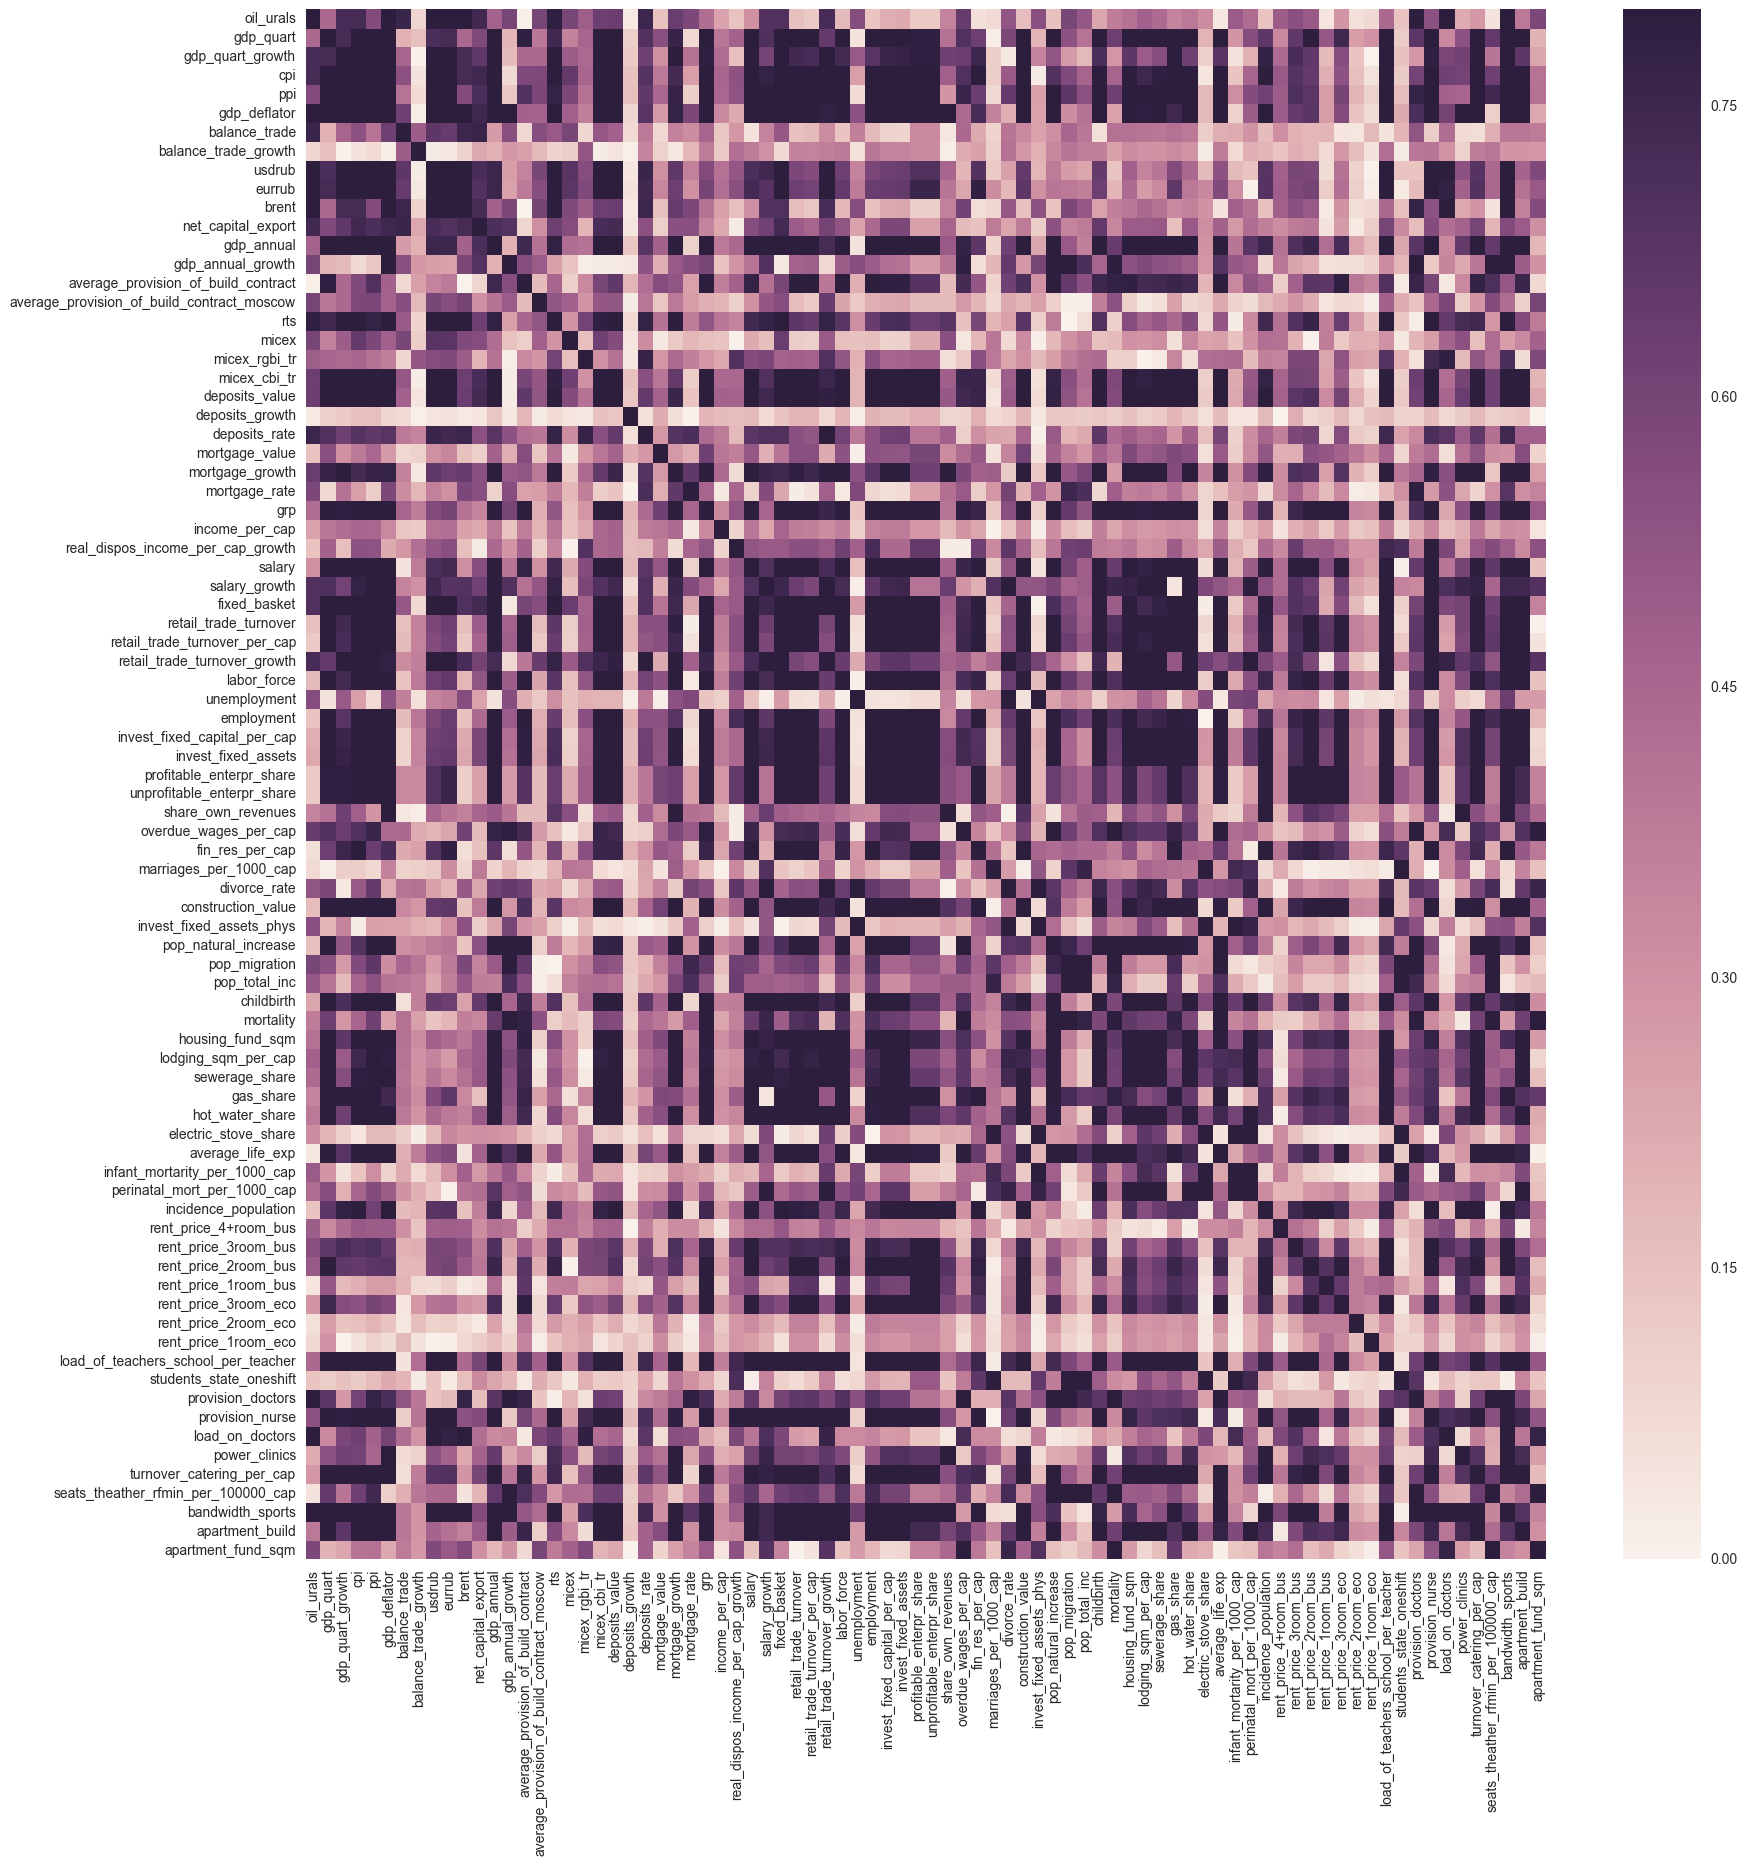

In [7]:
fig, ax = plt.subplots(figsize=(20,20))   
sns.heatmap(np.abs(macro_data.corr()), vmin=0, vmax = 0.8)

In [10]:
from statsmodels.stats.outliers_influence import variance_inflation_factor    

def calculate_vif_(X, thresh=10.0):
    variables = list(range(X.shape[1]))
    dropped=True
    while dropped:
        dropped=False
        vif = [variance_inflation_factor(X.iloc[:,variables].values, ix) for ix in range(X.iloc[:,variables].shape[1])]

        maxloc = vif.index(max(vif))
        if max(vif) > thresh:
            print('dropping \'' + X.iloc[:, variables].columns[maxloc] + '\' at index: ' + str(maxloc))
            del variables[maxloc]
            dropped=True

    print('Remaining variables:')
    print(X.columns[variables])
    return X.iloc[:,variables]

In [9]:
f = open('./data/data_dictionary.txt')
for line in f:
    print(line)

# train.csv and test.csv



price_doc: sale price (this is the target variable)

id: transaction id

timestamp: date of transaction

full_sq: total area in square meters, including loggias, balconies and other non-residential areas

life_sq: living area in square meters, excluding loggias, balconies and other non-residential areas

floor: for apartments, floor of the building

max_floor: number of floors in the building

material: wall material

build_year: year built

num_room: number of living rooms

kitch_sq: kitchen area

state: apartment condition

product_type: owner-occupier purchase or investment

sub_area: name of the district



The dataset also includes a collection of features about each property's surrounding neighbourhood, and some features that are constant across each sub area (known as a Raion). Most of the feature names are self explanatory, with the following notes. See below for a complete list.



full_all: subarea population

male_f, female_f: subarea population b